In [1]:
# Import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

In [2]:
# Read input dataset
df = pd.read_csv("CCPP_data.csv")
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


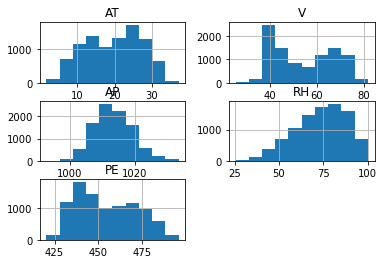

In [3]:
# Check features and output characteristics
pdf = df[['AT','V','AP','RH','PE']]
pdf.hist()
plt.show()

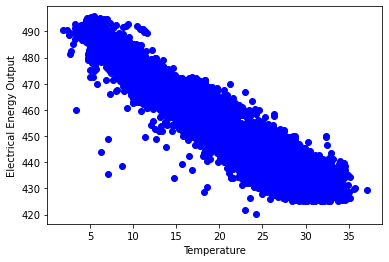

In [4]:
# Show linear association between Temperature and Output
plt.scatter(pdf.AT, pdf.PE, color='blue')
plt.xlabel("Temperature")
plt.ylabel("Electrical Energy Output")
plt.show()

In [5]:
# Set up training and testing split percentage
msk = np.random.rand(len(pdf)) < 0.8
train = pdf[msk]
test = pdf[~msk]

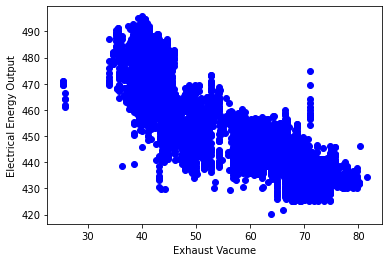

In [6]:
# Show linear association between Vacuum and Output
plt.scatter(train.V, train.PE, color='blue')
plt.xlabel("Exhaust Vacume")
plt.ylabel("Electrical Energy Output")
plt.show()

In [7]:
# Use Multiple Linear Regression for training
from sklearn import linear_model
regr = linear_model.LinearRegression()
X_train = np.asanyarray(train[['AT','V']])
y_train = np.asanyarray(train[['PE']])
regr.fit(X_train, y_train)
print("Coefficients: ", regr.coef_)

Coefficients:  [[-1.70810036 -0.32382193]]


In [8]:
# Print simple prediction score
yhat = regr.predict(test[['AT','V']])
X_test = np.asanyarray(test[['AT','V']])
y_test = np.asanyarray(test[['PE']])
print("Residual Sum of Squares: %.2f" %np.mean((yhat-y_test) ** 2))
print('Variance Score: %.2f' % regr.score(X_test, y_test))

Residual Sum of Squares: 26.56
Variance Score: 0.91


C:\Users\yales\anaconda3\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [9]:
# Use cross validattion for prediction
from sklearn.model_selection import cross_val_score
X = pdf[['AT','V']]
y = pdf[['PE']]
crg = regr.fit(X, y)
scores = cross_val_score(crg, X, y, cv=5)
scores

array([0.91639124, 0.91209361, 0.92058171, 0.91573174, 0.91332637])